In [2]:
#Importar pacotes
import pandas as pd
import numpy as np
import csv as csv

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#Shuffle the datasets
from sklearn.utils import shuffle

#Learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.decomposition import PCA


import math
import time
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score, roc_auc_score
#metrics.roc_auc_score(y_true, y_score[, …])

sns.set(style="ticks")
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.style.use('seaborn-colorblind')

In [3]:
#rd = pd.read_csv('C:\\Users\\Rodrigo\\Documents\\GitHub\\dsc_fev2018\\hackaton\\rd_500k.csv')
rd = pd.read_csv('rd-MG-SP-2018-2016.csv')
#rd = pd.read_csv('C:\\Users\\Rodrigo\\Documents\\GitHub\\dsc_fev2018\\hackaton\\rd_500k.csv',
#                        skiprows=lambda idx: np.random.random() > .5 if idx != 0 else False)



#sp = pd.read_csv('C:\\Users\\Rodrigo\\Documents\\GitHub\\dsc_fev2018\\hackaton\\sp_500k.csv')


/home/wilson_tayar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rd["DIAG_PRINC"] = rd["DIAG_PRINC"].apply( lambda x :  x[0])

In [5]:
rd["PROC_SOLIC"] = rd["PROC_SOLIC"].apply( lambda x :  str(x)[:4])
#rd["PROC_REA"] = rd["PROC_REA"].apply( lambda x :  str(x)[:4])

In [6]:
rd['IDADE_2'] = rd['IDADE']**2

In [7]:
columns_X = ['SEXO', 'PROC_SOLIC', 'PROC_REA', 'DIAG_PRINC', 'IND_VDRL', 'MUNIC_MOV','IDADE', 'CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','CNES', 'TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9']


# ['SEXO', 'UTI_MES_TO', 'UTI_INT_TO', 'QT_DIARIAS','PROC_SOLIC', 'PROC_REA', 'DIAG_PRINC', 'IND_VDRL', 'MUNIC_MOV','IDADE', 'DIAS_PERM', 'MORTE', 'CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','CNES', 'DIAGSEC1','DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7','DIAGSEC8', 'DIAGSEC9', 'TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9']

X_data = rd
X_data = X_data.drop(['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'CEP', 'MUNIC_RES','NASC','UTI_MES_TO', 'UTI_INT_TO', 'DIAR_ACOM', 'QT_DIARIAS','VAL_SH', 'VAL_SP', 'VAL_TOT', 'VAL_UTI','DT_INTER', 'DT_SAIDA','MUNIC_MOV', 'COD_IDADE','DIAS_PERM', 'MORTE', 'NACIONAL','NUM_FILHOS','CNAER', 'CNES', 'INFEHOSP', 'RACA_COR', 'ETNIA', 'DIAGSEC1','DIAGSEC2', 'DIAGSEC3', 'DIAGSEC4', 'DIAGSEC5', 'DIAGSEC6', 'DIAGSEC7','DIAGSEC8', 'DIAGSEC9'],axis=1)
#X_data = X_data.drop(['Unnamed: 0'],axis=1)
Y_data = rd['DIAS_PERM']




In [8]:
#Y_data.reshape()
Y_data = np.reshape(Y_data,(len(Y_data),1))


/home/wilson_tayar/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [9]:
cols_dummy = ['SEXO','PROC_SOLIC','PROC_REA','DIAG_PRINC', 'IND_VDRL','CAR_INT', 'INSTRU', 'CONTRACEP1', 'CONTRACEP2', 'GESTRISCO','TPDISEC1', 'TPDISEC2', 'TPDISEC3', 'TPDISEC4','TPDISEC5', 'TPDISEC6', 'TPDISEC7', 'TPDISEC8', 'TPDISEC9']
X_data = pd.get_dummies(X_data,dummy_na=True,columns=cols_dummy,drop_first=True)
X_data.shape



(7969252, 157)

In [10]:
#X_data = pd.X_data.fillna(0)
X_data = X_data.fillna(0,axis=1)


# Previsão com Método de Árvore

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_middle, Y_train, Y_middle = train_test_split(X_data,Y_data,test_size=0.3,random_state=42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_middle,Y_middle,test_size=(1/3),random_state=42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

model = RandomForestRegressor(n_estimators=100, criterion='mse',max_features='log2' ,max_depth=20, min_samples_split=250)
model.fit(X_train,Y_train)

/home/wilson_tayar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=250,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

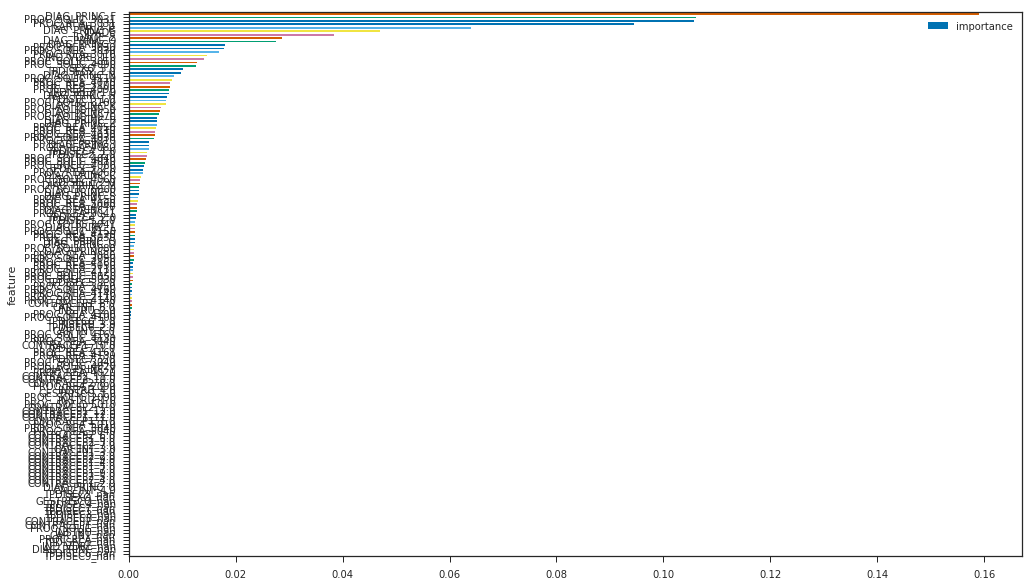

In [18]:
model.feature_importances_
imps = pd.DataFrame({'importance': model.feature_importances_, 'feature': X_train.columns}).sort_values('importance')
                    
imps.plot(x='feature',y='importance',kind='barh')

             feature  importance
45     PROC_REA_3080    0.001022
73      DIAG_PRINC_E    0.001025
12   PROC_SOLIC_3080    0.001041
72      DIAG_PRINC_D    0.001071
85      DIAG_PRINC_Q    0.001094
65     PROC_REA_5030    0.001111
58     PROC_REA_4120    0.001111
28   PROC_SOLIC_4150    0.001175
80      DIAG_PRINC_L    0.001198
10   PROC_SOLIC_3041    0.001202
146     TPDISEC5_1.0    0.001371
144     TPDISEC4_2.0    0.001390
43     PROC_REA_3041    0.001490
88      DIAG_PRINC_T    0.001552
50     PROC_REA_4040    0.001606
68     PROC_REA_5060    0.001632
61     PROC_REA_4150    0.001744
87      DIAG_PRINC_S    0.001914
86      DIAG_PRINC_R    0.001957
35   PROC_SOLIC_5060    0.001977
81      DIAG_PRINC_M    0.002050
135     TPDISEC1_2.0    0.002092
19   PROC_SOLIC_4060    0.002286
71      DIAG_PRINC_C    0.002564
52     PROC_REA_4060    0.002741
141     TPDISEC3_2.0    0.002771
21   PROC_SOLIC_4080    0.003046
14   PROC_SOLIC_4010    0.003188
17   PROC_SOLIC_4040    0.003406
138     TP

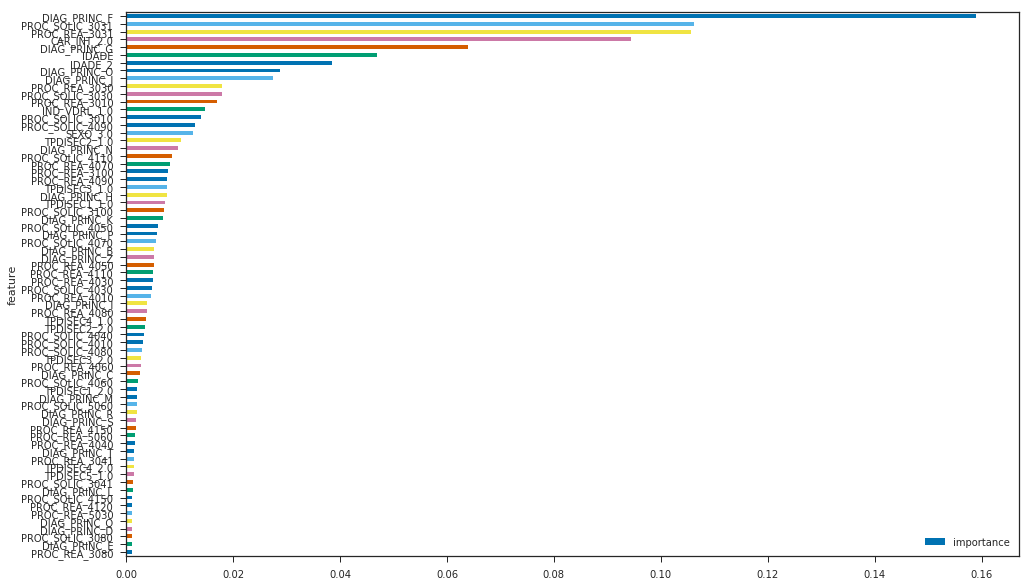

In [19]:
#imps['importance'>0.005]
imps_filt = imps[imps['importance']>0.001]
print(imps_filt)

imps_filt.plot(x='feature',y='importance',kind='barh')
plt.show()

In [21]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
Y_train = np.reshape(Y_train,(len(Y_train),))
Y_test = np.reshape(Y_test,(len(Y_test),))

from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error

print(str(r2_score(Y_train,y_train_pred)),' é o R2 do training set')
print(str(r2_score(Y_test,y_test_pred)), ' é o R2 do test set')

print(str(mean_squared_error(Y_train,y_train_pred)),' é o MSE do training set')
print(str(mean_squared_error(Y_test,y_test_pred)), ' é o MSE do test set')

print(str(median_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(median_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')

#print(str(recall_score(Y_train,y_train_pred)),' é o recall do training set')
#print(str(recall_score(Y_test,y_test_pred)), ' é o recall do test set')

#print(str(roc_auc_score(Y_train,y_train_pred)),' é o roc_auc do training set')
#print(str(roc_auc_score(Y_test,y_test_pred)), ' é o roc_auc do test set')

0.3198854806697905  é o R2 do training set
0.31584687465845207  é o R2 do test set
46.752991202449145  é o MSE do training set
47.09261356648361  é o MSE do test set
2.3643456055502803  é o MAE do training set
2.362874533481911  é o MAE do test set


In [22]:
print(Y_train.shape)
print(y_train_pred.shape)
print(Y_test.shape)
print(y_test_pred.shape)

(5578476,)
(5578476,)
(796926,)
(796926,)


# Testando o KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train, X_middle, Y_train, Y_middle = train_test_split(X_data,Y_data,test_size=0.3,random_state=42)
X_cv, X_test, Y_cv, Y_test = train_test_split(X_middle,Y_middle,test_size=(1/3),random_state=42)
model =  KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
model.fit(X_train,Y_train)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_cv_pred = model.predict(X_cv)
Y_cv = np.reshape(Y_cv,(len(Y_cv),))
Y_train = np.reshape(Y_train,(len(Y_train),))
Y_test = np.reshape(Y_test,(len(Y_test),))

from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error

print(str(r2_score(Y_train,y_train_pred)),' é o R2 do training set')
print(str(r2_score(Y_cv,y_cv_pred)), ' é o R2 do CV set')
print(str(r2_score(Y_test,y_test_pred)), ' é o R2 do test set')

print(str(mean_squared_error(Y_train,y_train_pred)),' é o MSE do training set')
print(str(mean_squared_error(Y_cv,y_cv_pred)), ' é o MSE do CV set')
print(str(mean_squared_error(Y_test,y_test_pred)), ' é o MSE do test set')

print(str(median_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(median_absolute_error(Y_cv,y_cv_pred)), ' é o MAE do CV set')
print(str(median_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')


# Testando o Lasso (Regressão e Feature Importance)

In [23]:
from sklearn import linear_model
lasso_selection = pd.DataFrame(X_train.columns)
#alfa_ranges = [10,1,0.1,0.05,0.01,0.005,0.001,0.0005]
alfa_ranges = [0.0005,0.001,0.005,0.01,0.05,0.1,1,10]
for alfa in alfa_ranges:
    model = linear_model.Lasso(alpha=alfa)
    model.fit(X_train,Y_train)
    lasso_selection= np.hstack((lasso_selection,np.reshape(model.coef_,(len(lasso_selection),1))))

In [24]:
#print(lasso_selection.shape)
lasso_selection = pd.DataFrame(lasso_selection)
print(lasso_selection)


                   0            1            2            3            4  \
0              IDADE    0.0482217    0.0482552    0.0476231    0.0409982   
1            IDADE_2 -0.000238932 -0.000239024 -0.000230823 -0.000174745   
2           SEXO_3.0    -0.528483     -0.53188    -0.550251     -0.55685   
3           SEXO_nan            0            0            0            0   
4    PROC_SOLIC_2090     0.120881            0            0            0   
5    PROC_SOLIC_2110     -3.00491     -3.21474     -2.30523           -0   
6    PROC_SOLIC_3010      1.54346      1.02105            0           -0   
7    PROC_SOLIC_3030      1.72711      1.37079      1.36731      1.35428   
8    PROC_SOLIC_3031       3.9882      3.68069      3.60685      3.62399   
9    PROC_SOLIC_3040     0.527758     0.232307            0            0   
10   PROC_SOLIC_3041      1.95635      1.72365      1.45818      1.08992   
11   PROC_SOLIC_3050      2.64553      2.34367      2.25693      2.13373   
12   PROC_SO

In [25]:
lasso_selection_data = lasso_selection.drop(0,axis=1)
weights = pd.DataFrame(np.arange(len(alfa_ranges))+1)
#print(weights.shape)
lasso_selection_wa = np.dot(lasso_selection_data,weights)
lasso_selection_wa = lasso_selection_wa
lasso_selection_wa = np.hstack((pd.DataFrame(X_train.columns),lasso_selection_wa))
lasso_selection_wa = pd.DataFrame(lasso_selection_wa,columns=['feature','importance'])
print(lasso_selection_wa.sort_values('importance'))

             feature importance
83      DIAG_PRINC_O   -75.2432
78      DIAG_PRINC_J   -63.1686
76      DIAG_PRINC_H    -50.005
82      DIAG_PRINC_N    -47.404
39     PROC_REA_3010   -38.7729
91      DIAG_PRINC_Z   -34.9294
79      DIAG_PRINC_K   -27.0479
14   PROC_SOLIC_4010     -22.82
72      DIAG_PRINC_D    -18.177
86      DIAG_PRINC_R   -17.0954
60     PROC_REA_4140   -16.8468
5    PROC_SOLIC_2110   -16.3501
73      DIAG_PRINC_E   -16.2695
87      DIAG_PRINC_S   -15.4427
38     PROC_REA_2110   -14.9281
2           SEXO_3.0    -11.206
71      DIAG_PRINC_C   -10.7174
19   PROC_SOLIC_4060   -10.6529
81      DIAG_PRINC_M   -9.92186
18   PROC_SOLIC_4050   -9.28641
65     PROC_REA_5030   -9.23204
84      DIAG_PRINC_P   -8.36026
77      DIAG_PRINC_I   -7.41967
47     PROC_REA_4010   -7.17211
80      DIAG_PRINC_L    -7.0935
85      DIAG_PRINC_Q   -6.04257
88      DIAG_PRINC_T   -5.45042
45     PROC_REA_3080   -5.26864
29   PROC_SOLIC_4160   -5.24882
113   CONTRACEP1_8.0   -4.55352
..      

In [26]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train,Y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_cv_pred = model.predict(X_cv)
Y_cv = np.reshape(Y_cv,(len(Y_cv),))
Y_train = np.reshape(Y_train,(len(Y_train),))
Y_test = np.reshape(Y_test,(len(Y_test),))

from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error

print(str(r2_score(Y_train,y_train_pred)),' é o R2 do training set')
print(str(r2_score(Y_cv,y_cv_pred)), ' é o R2 do CV set')
print(str(r2_score(Y_test,y_test_pred)), ' é o R2 do test set')

print(str(mean_squared_error(Y_train,y_train_pred)),' é o MSE do training set')
print(str(mean_squared_error(Y_cv,y_cv_pred)), ' é o MSE do CV set')
print(str(mean_squared_error(Y_test,y_test_pred)), ' é o MSE do test set')

print(str(median_absolute_error(Y_train,y_train_pred)),' é o MAE do training set')
print(str(median_absolute_error(Y_cv,y_cv_pred)), ' é o MAE do CV set')
print(str(median_absolute_error(Y_test,y_test_pred)), ' é o MAE do test set')


0.19766901267379022  é o R2 do training set
0.19750830241396977  é o R2 do CV set
0.1957135313046906  é o R2 do test set
55.15449608230182  é o MSE do training set
55.22590761056052  é o MSE do CV set
55.36180492943186  é o MSE do test set
2.9336156252884162  é o MAE do training set
2.9326096866614897  é o MAE do CV set
2.9273821364626222  é o MAE do test set


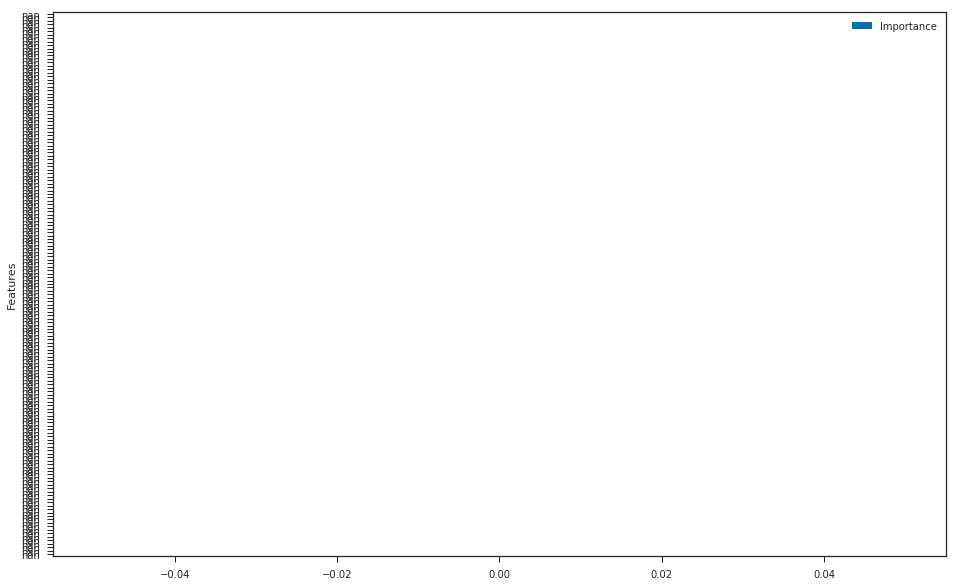

In [27]:
lasso_selection_wa = pd.DataFrame(lasso_selection_wa,columns=['Features','Importance']).sort_values('Importance')
lasso_selection_wa.plot(x='Features',y='Importance',kind='barh')
plt.show()

In [180]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(rd_df['DIAG_PRINC'],rd_df['DIAS_PERM'])
plt.show()

NameError: name 'rd_df' is not defined

In [9]:
import numpy as np
corr = np.corrcoef(rd_df_dummy,rowvar=False)
corr = corr**2
head(corr)
#plt.figure(figsize=(30,30))
#ax = sns.heatmap(corr,vmax=.3,vmin=-0.5, square=True,xticklabels=data.columns,yticklabels=data.columns,annot=True, annot_kws={"size": 10})
#plt.show()

MemoryError: 

In [28]:
from scipy.stats import spearmanr

rho, pval = spearmanr(data_Y,data_X,axis=0)

#corr = np.corrcoef(data,rowvar=False)
#corr = corr**2
#center = np.average(corr)

#print(corr)

rho_adj = rho**2
rho_adj = np.sqrt(rho_adj)

plt.figure(figsize=(30,30))
ax = sns.heatmap(rho_adj,vmax=.6,vmin=0, square=True,xticklabels=data.columns,yticklabels=data.columns,annot=True, annot_kws={"size": 10})
plt.show()

NameError: name 'data_Y' is not defined